In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)

train_df = pd.read_csv('DATA/train.csv')
test_df = pd.read_csv('DATA/test.csv')
submission_sample = pd.read_csv('DATA/sample_submission.csv')

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
submission_sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Data Cleanup on the test Data
Lets look at the no of nulls in the training dataset

In [7]:
pd.set_option('display.max_rows', None)
train_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

LotFrontage column Nulls dealt with as the average figure for that column

In [8]:
train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)

/tmp/ipykernel_4110/861508967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LotFrontage'].fillna(train_df['LotFrontage'].median(), inplace=True)


Alley column - Lets see if there is any corolation between the sales price and Alley access with the house

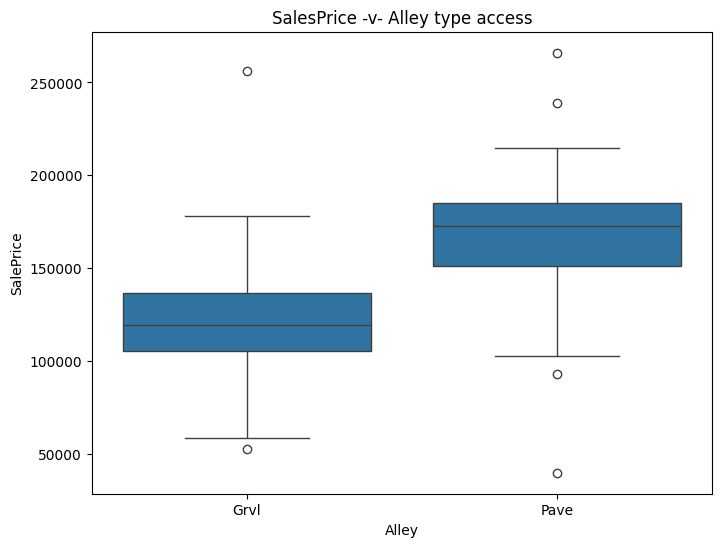

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

alley_price_comparison = train_df.groupby('Alley')['SalePrice'].mean()
#Boxplot chart to see SalesPrice distribution amoungst alley types
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='Alley', y='SalePrice')
plt.title('SalesPrice -v- Alley type access')
plt.show()

Paved Alley access does seem to increase the average value of the property, so we will keep the column but replace the nulls with 'None'

In [10]:
train_df['Alley'] = train_df['Alley'].astype('object')
train_df['Alley'].fillna('None', inplace=True)

/tmp/ipykernel_4110/4038184766.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Alley'].fillna('None', inplace=True)


In [11]:
train_df['MasVnrType'].fillna('None', inplace=True)

/tmp/ipykernel_4110/948743105.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna('None', inplace=True)


Now lets anaylze the BsmtQual column to see if Basement quality has an effect on the SalesPrice

In [12]:
bsmtqual = train_df.groupby('BsmtQual')['SalePrice'].mean()
print(bsmtqual)

BsmtQual
Ex    327041.041322
Fa    115692.028571
Gd    202688.478964
TA    140759.818182
Name: SalePrice, dtype: float64


In [13]:
train_df.fillna({'BsmtQual' : 'None'}, inplace=True)

In [14]:
train_df.fillna({'BsmtCond' : 'None'}, inplace=True)
train_df.fillna({'BsmtExposure': 'None'}, inplace=True)
train_df.fillna({'BsmtFinType1': 'None'}, inplace=True)
train_df.fillna({'BsmtFinType2': 'None'}, inplace=True)

Analyzing the Electrics column

In [15]:
electrics = train_df.groupby('Electrical')['SalePrice'].mean()
print(electrics)

Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    186825.113193
Name: SalePrice, dtype: float64


In [16]:
train_df.dropna(subset=['Electrical'], inplace=True)

In [17]:
fireplaces = train_df.groupby('FireplaceQu')['SalePrice'].mean()
print(fireplaces)

FireplaceQu
Ex    337712.500000
Fa    167298.484848
Gd    226351.415789
Po    129764.150000
TA    205723.488818
Name: SalePrice, dtype: float64


In [18]:
train_df.fillna({'FireplaceQu':'None'}, inplace=True)

Visualize the correlation between the SalesPrices of homes against the property having a garage or not

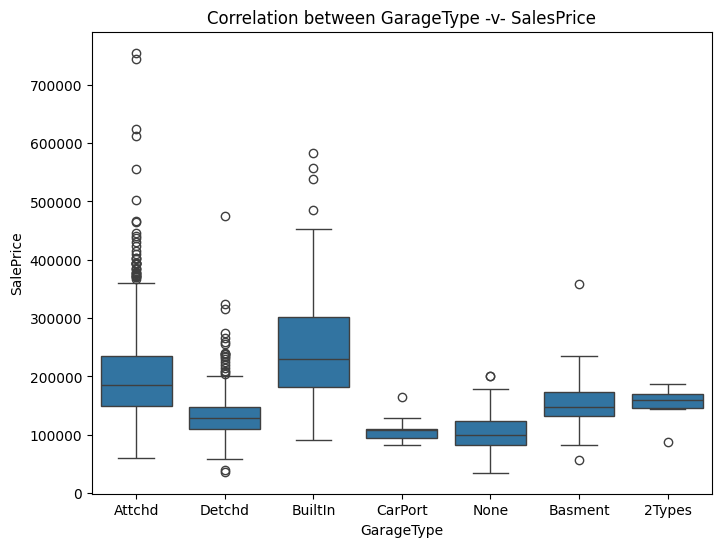

In [19]:
train_df.fillna({'GarageType':'None'}, inplace=True)

plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='GarageType', y='SalePrice')
plt.title('Correlation between GarageType -v- SalesPrice')

plt.show()

In [20]:
train_df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

Analyze what effect the year the garage was bult against price

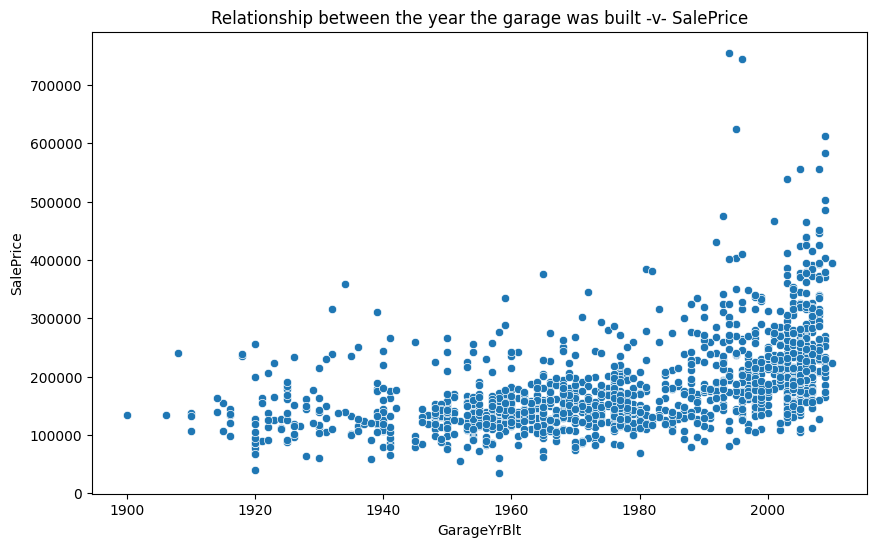

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=train_df, x='GarageYrBlt', y='SalePrice')
plt.title('Relationship between the year the garage was built -v- SalePrice')
plt.show()

In my view correlation is week so will drop the GarageYrBlt column

In [22]:
train_df.drop(columns=['GarageYrBlt'], inplace=True)

In [23]:
train_df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

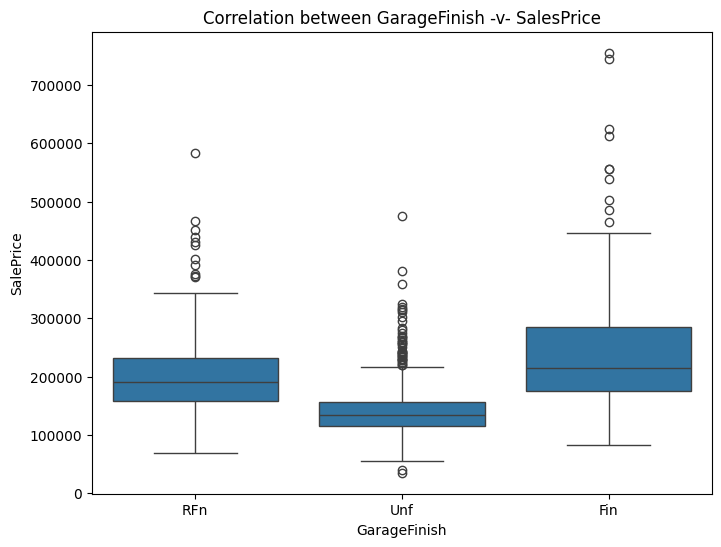

In [24]:
 
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='GarageFinish', y='SalePrice')
plt.title('Correlation between GarageFinish -v- SalesPrice')

plt.show()

Set all the other nulls in the other Garage finish, quality and condition to 'None'

In [25]:
train_df.fillna({'GarageFinish':'None'},inplace=True)

In [26]:
train_df.fillna({'GarageQual':'None'},inplace=True)
train_df.fillna({'GarageCond':'None'},inplace=True)

In [27]:
train_df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

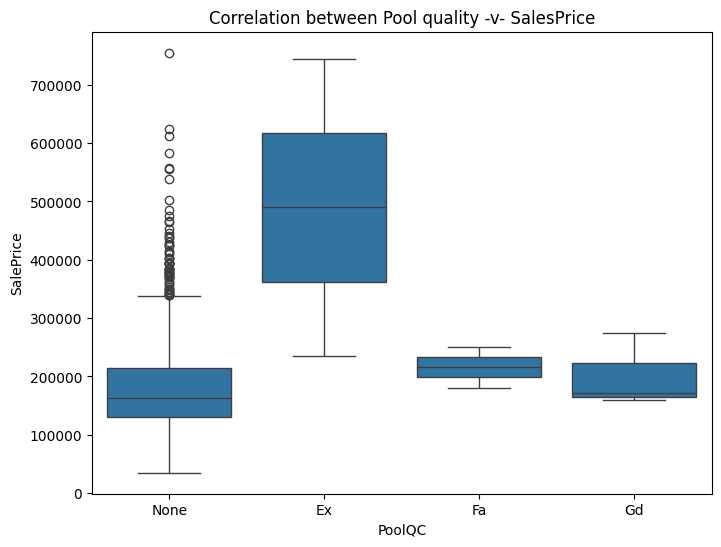

In [28]:
train_df.fillna({'PoolQC':'None'},inplace=True)

plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='PoolQC', y='SalePrice')
plt.title('Correlation between Pool quality -v- SalesPrice')

plt.show()

Strong correlation between the pool quality and those houses that don't have pools with SalePrice

In [29]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

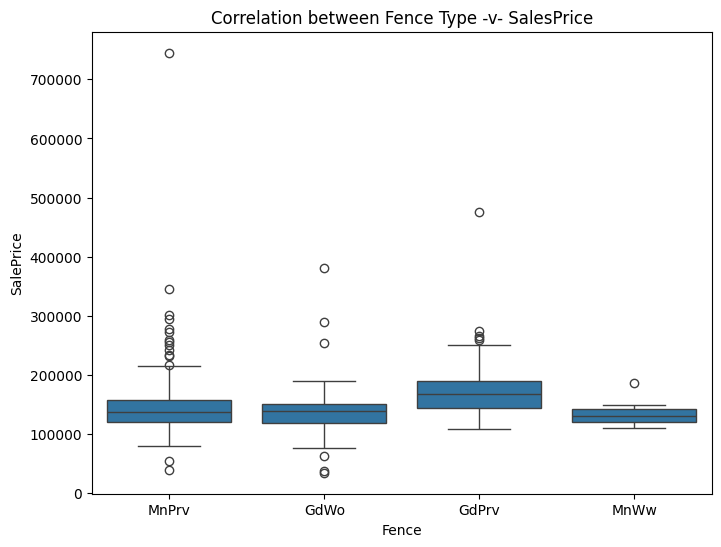

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='Fence', y='SalePrice')
plt.title('Correlation between Fence Type -v- SalesPrice')

plt.show()

Regarding how the type of fencing effects the SalePrice there does not seem to be much change in the price compared to the type of fence, so will drop the Fence column

In [31]:
train_df.drop(columns='Fence', inplace=True)

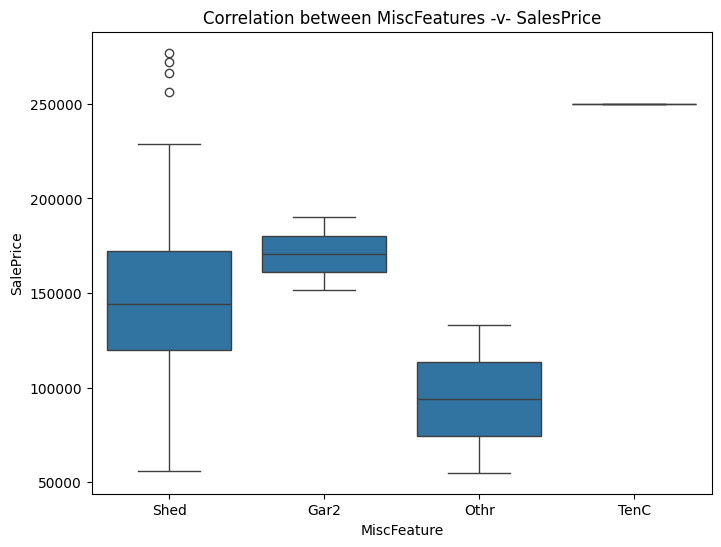

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(data=train_df, x='MiscFeature', y='SalePrice')
plt.title('Correlation between MiscFeatures -v- SalesPrice')

plt.show()

There appears to be an affect on House Sales Prices for Tennis Courts, but for the other features it is mixed so will drop this column.

In [33]:
train_df.drop(columns=['Id','MiscFeature','Utilities','Street','Condition2','LandSlope','3SsnPorch','LowQualFinSF','MiscVal','RoofMatl'], inplace=True)

In [36]:
y = train_df['SalePrice']
train_df.drop(columns=['SalePrice'], inplace=True)
X = train_df


In [40]:
X.head(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,PoolQC,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,None,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,None,2,2008,WD,Normal
1,20,RL,80.0,9600,None,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,None,5,2007,WD,Normal
2,60,RL,68.0,11250,None,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,None,9,2008,WD,Normal
3,70,RL,60.0,9550,None,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,None,2,2006,WD,Abnorml
4,60,RL,84.0,14260,None,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,None,12,2008,WD,Normal
5,50,RL,85.0,14115,None,IR1,Lvl,Inside,Mitchel,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,Unf,2,480,TA,TA,Y,40,30,0,0,0,None,10,2009,WD,Normal
6,20,RL,75.0,10084,None,Reg,Lvl,Inside,Somerst,Norm,1Fam,1Story,8,5,2004,2005,Gable,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,RFn,2,636,TA,TA,Y,255,57,0,0,0,None,8,2007,WD,Normal
7,60,RL,69.0,10382,None,IR1,Lvl,Corner,NWAmes,PosN,1Fam,2Story,7,6,1973,1973,Gable,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,RFn,2,484,TA,TA,Y,235,204,228,0,0,None,11,2009,WD,Normal
8,50,RM,51.0,6120,None,Reg,Lvl,Inside,OldTown,Artery,1Fam,1.5Fin,7,5,1931,1950,Gable,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,Unf,2,468,Fa,TA,Y,90,0,205,0,0,None,4,2008,WD,Abnorml
9,190,RL,50.0,7420,None,Reg,Lvl,Corner,BrkSide,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,RFn,1,205,Gd,TA,Y,0,4,0,0,0,None,1,2008,WD,Normal
